In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

In [80]:
df=pd.read_csv('heart.csv')

In [81]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Explanation of set of data

## Changing in the column names to be a bit clearer

In [82]:
df.columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Data Visualization

Let's look at how data is correlated

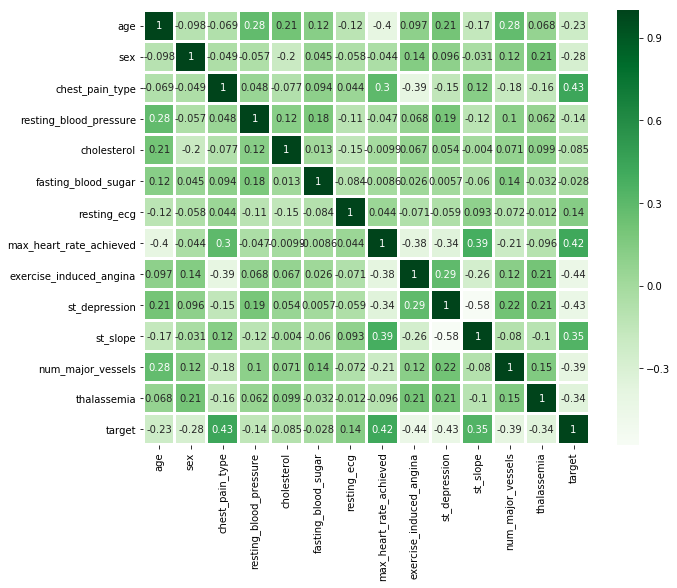

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidths=2)
# Not much correlation in the data

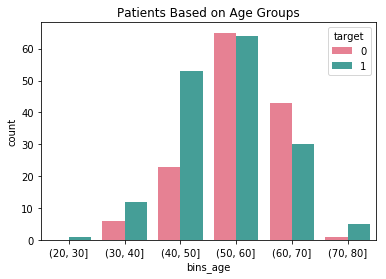

In [84]:
df1=pd.read_csv('heart.csv')
agebins=[20,30,40,50,60,70,80]
df2=pd.cut(df1.age, bins=agebins)
df1['bins_age']=df2
v1=sns.countplot(x='bins_age', data=df1, palette='husl', linewidth=3, hue='target')
v1.set_title('Patients Based on Age Groups')
plt.show(v1)
# the graph points out that most of the heart patients are in the age groups of 40's and 50's

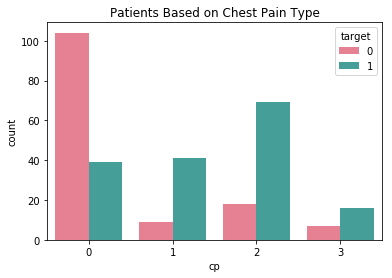

In [85]:
v2=sns.countplot(x='cp', data=df1, palette='husl', linewidth=3, hue='target')
v2.set_title('Patients Based on Chest Pain Type')
plt.show(v2)
# the graph points out that most of the heart patients get chest pain type 2

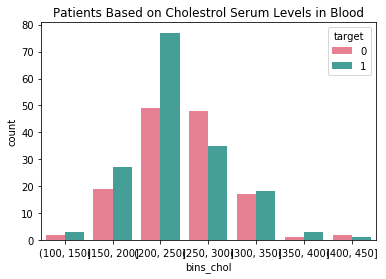

In [86]:
cholbins=[100,150,200,250,300,350,400,450]
df3=pd.cut(df1.chol, bins=cholbins)
df1['bins_chol']=df3
v3=sns.countplot(x='bins_chol', data=df1, palette='husl', linewidth=3, hue='target')
v3.set_title('Patients Based on Cholestrol Serum Levels in Blood')
plt.show(v3)
# the graph points out that most of the heart patients get blood cholestrol level in range of (200-250)mg/dl

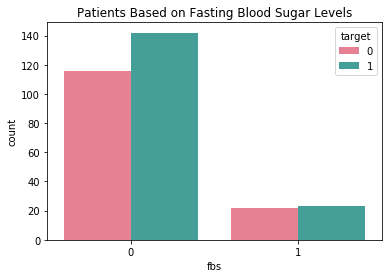

In [87]:
v4=sns.countplot(x='fbs', data=df1, palette='husl', linewidth=3, hue='target')
v4.set_title('Patients Based on Fasting Blood Sugar Levels')
plt.show(v4)
# the graph points out that when fbs level are above 120 mg/dl, it is less likely to have a heart disease

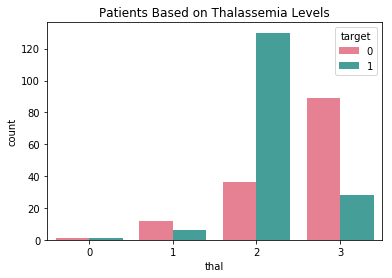

In [88]:
v5=sns.countplot(x='thal', data=df1, palette='husl', linewidth=3, hue='target')
v5.set_title('Patients Based on Thalassemia Levels')
plt.show(v5)

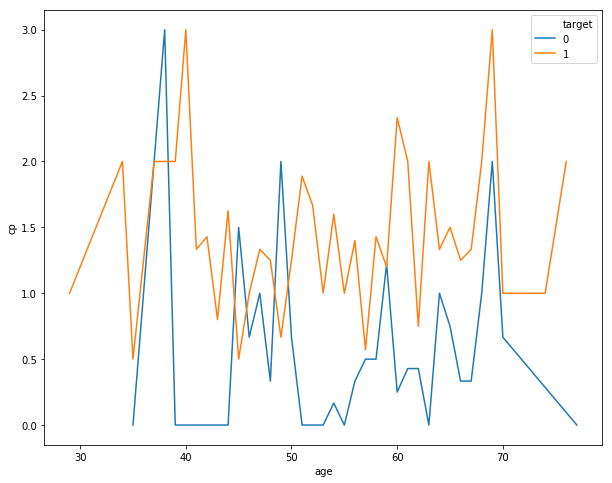

In [89]:
plt.figure(figsize=(10,8))
v6=sns.lineplot(data=df1, x='age', y='cp', ci=None, hue='target')
plt.show(v6)

## Changing the values of categorical variables, to improve interpretation later on

In [90]:
df['sex'][df['sex']==0]='female'
df['sex'][df['sex']==1]='male'

df['chest_pain_type'][df['chest_pain_type']==0]='asymptomatic'
df['chest_pain_type'][df['chest_pain_type']==1]='typical angina'
df['chest_pain_type'][df['chest_pain_type']==2]='atypical angina'
df['chest_pain_type'][df['chest_pain_type']==3]='non-anginal pain'

df['fasting_blood_sugar'][df['fasting_blood_sugar']==0]='lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar']==1]='greater than 120mg/ml'

df['resting_ecg'][df['resting_ecg']==0]='normal'
df['resting_ecg'][df['resting_ecg']==1]='ST-T wave abnormality'
df['resting_ecg'][df['resting_ecg']==2]='left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina']==0]='no'
df['exercise_induced_angina'][df['exercise_induced_angina']==1]='yes'

df['st_slope'][df['st_slope']==0]='downsloping'
df['st_slope'][df['st_slope']==1]='upsloping'
df['st_slope'][df['st_slope']==2]='flat'

df['thalassemia'][df['thalassemia']==1]='normal'
df['thalassemia'][df['thalassemia']==2]='fixed defect'
df['thalassemia'][df['thalassemia']==3]='reversable defect'

C:\Users\Bhavesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Bhavesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bhavesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Bhavesh\Anaconda3\li

In [91]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,downsloping,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,downsloping,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,asymptomatic,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


## Creating dummy variables

For the categorical variables, dummy variables are created. First category of each dummy variables are droped because of 'dummy variable trap'.

In [92]:
df=pd.get_dummies(df, drop_first=True)

In [93]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In [94]:
X=df.drop(['target'], axis='columns')
Y=df.target

## Normalization

Data is normalized in order to make all features balanced. In other words, to remove the dominance of 1 feature on all other features.

In [95]:
X=(X-np.min(X))/(np.max(X)-np.min(X)).values

## Spliting of train and test data 

By using sklearn library, data is devided into train data and test data. 80% of the data will be used for training and 20 % for testing the model.

In [96]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression

In [124]:
lr=LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

C:\Users\Bhavesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8688524590163934

# KNN (K Nearest Neighbours)

In [135]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.8688524590163934

# Decision Tree

### ADVANTAGES OF USING DECISION TREES.
Its easy to use and implement.
Not needed too much data prepearing.
It looks like its similar to human thinking form.
Categorical data can be used.

In [155]:
dt=DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.8032786885245902

# Random Forest

In [151]:
rm=RandomForestClassifier(n_estimators=10, random_state=1)
rm.fit(X_train, Y_train)
rm.score(X_test, Y_test)

0.8524590163934426

# Support Vector Machine

In [153]:
svm=SVC(random_state=1)
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

C:\Users\Bhavesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8524590163934426

# Conclusion